# **Descripción de la Tarea**  
Se dispone de un conjunto de datos proporcionado por una empresa, que contiene información sobre inversiones y ventas desde 1980 hasta 2017. A partir de estos datos, se llevará a cabo un análisis detallado para extraer información relevante.  

## **Objetivos**  

1. **Construcción de un modelo de regresión lineal**  
   - Calcular los parámetros del modelo y analizar su significado.  

2. **Estimación de ventas**  
   - Determinar la cantidad de ventas proyectadas si la inversión asciende a 7 millones de euros.  

3. **Validación del modelo**  
   - Evaluar la precisión del modelo utilizando la **Suma de Cuadrados del Error (SCE)** y el **coeficiente de determinación**.  

4. **Análisis e interpretación**  
   - Explicar y justificar los resultados obtenidos en cada etapa del análisis.  


# Importación de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import statsmodels.api as sm
import seaborn as sns
import math
import pandas.testing as tm
%matplotlib inline

<ipython-input-1-d328ecb99472>:4: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


# Carga de datos y visualización general

In [2]:
url = 'https://raw.githubusercontent.com/md-lorente/data/master/datos_ventas.csv'
df = pd.read_csv(url, sep=';', decimal=',')

Visualicemos los primeros 10 registros del dataset

In [3]:
df.head(10)

,Fecha_anual,Inversion,Ventas
0,1980,1.0,4.61
1,1981,1.5,5.18
2,1982,2.0,5.09
3,1983,2.5,5.44
4,1984,3.0,0.62
5,1985,3.5,6.39
6,1986,4.0,0.64
7,1987,4.5,7.04
8,1988,5.0,7.13
9,1989,5.5,7.48


### Veamos la estructura de nuestro dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fecha_anual  38 non-null     int64  
 1   Inversion    38 non-null     float64
 2   Ventas       38 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.0 KB


### Analisis global de datos estadisticos de la muestra de variables cuantitativas

In [5]:
df.describe(include ='float64')

,Inversion,Ventas
count,38.000000,38.000000
mean,10.250000,10.492895
std,5.556528,4.315321
min,1.000000,0.620000
25%,5.625000,7.565000
50%,10.250000,11.080000
75%,14.875000,14.032500
max,19.500000,17.450000


### Cálculo de la mediana

In [6]:
print("La mediana de la variable Inversion es:", df["Inversion"].median())
print("La mediana de la variable Venta es:", df["Ventas"].median())
# Cálculo de la moda
print("Las modas de la variable Inversion son:", df["Inversion"].mode().to_numpy())
print("Las modas de la variable Ventas son:", df["Ventas"].mode().to_numpy())

La mediana de la variable Inversion es: 10.25
La mediana de la variable Venta es: 11.079999999999998
Las modas de la variable Inversion son: [ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5 14.  14.5
 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5]
Las modas de la variable Ventas son: [ 0.62  0.64  4.61  5.09  5.18  5.44  6.39  7.04  7.13  7.48  7.82  8.01
  8.22  8.86  9.1   9.78  9.82 10.05 11.04 11.12 11.44 11.47 12.01 12.33
 12.53 12.56 13.4  13.83 14.1  14.64 14.95 15.04 15.06 15.69 15.86 16.21
 16.72 17.45]


## Gráficas de dispersión

Text(0.5, 1.0, 'Distribución de Inversión verus Ventas')

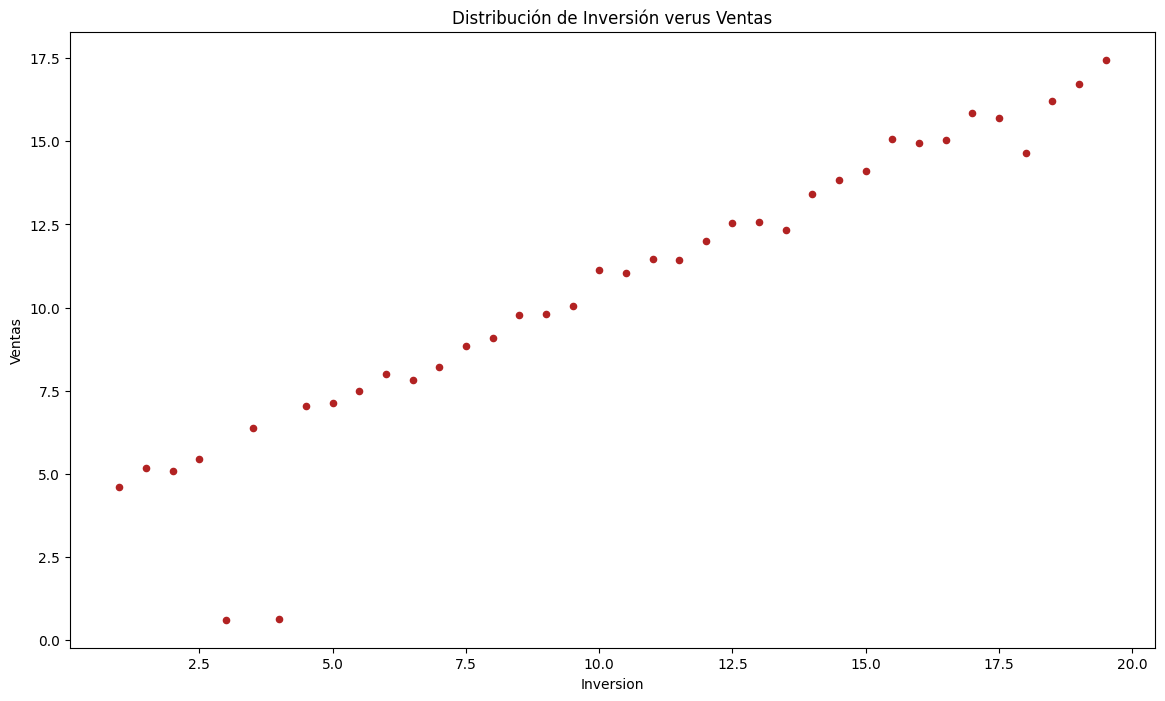

In [7]:
fig, ax = plt.subplots(figsize=(14,8))

df.plot(
    x = 'Inversion',
    y = 'Ventas',
    c= 'firebrick',
    kind = 'scatter',
    ax = ax
)
ax.set_title('Distribución de Inversión verus Ventas')

La gráfica representa la relación entre inversión y ventas mediante un diagrama de dispersión. Se puede observar una tendencia creciente, lo que indica que cuando la inversión aumenta, las ventas también lo hacen. Esto significa que invertir más podría estar ayudando a mejorar el rendimiento en ventas.
Los datos siguen un patrón lineal, aunque hay algunos puntos que se desvían en la parte baja de la gráfica. Esto podría significar que en ciertos casos, la inversión no generó el impacto esperado en ventas, posiblemente debido a factores externos como las condiciones del mercado.







## Valores atípicos

Analicemos ambas variables para determinar sus varlores atipicos:

In [8]:
print("Calculo de primer cuartil, tercer cuartil y rango intercuartílico (IQR Variable Ventas")
Q1_ventas = df["Ventas"].quantile(0.25)
Q3_ventas = df["Ventas"].quantile(0.75)
IQR_ventas = Q3_ventas - Q1_ventas

print("Primer cuartil:", Q1_ventas)
print("Tercer cuartil:", Q3_ventas)
print("Rango intercuartílico", IQR_ventas)

print("\n\nCalculo de primer cuartil, tercer cuartil y ranco intercuartílico (IQR) variable Inversión")
Q1_inversion = df["Inversion"].quantile(0.25)
Q3_inversion = df["Inversion"].quantile(0.75)
IQR_inversion = Q3_inversion - Q1_inversion

print("Primer cuartil:", Q1_inversion)
print("Tercer cuartil:",  Q3_inversion)
print("Rango intercuartílico:", IQR_inversion)

Calculo de primer cuartil, tercer cuartil y rango intercuartílico (IQR Variable Ventas
Primer cuartil: 7.565
Tercer cuartil: 14.032499999999999
Rango intercuartílico 6.4674999999999985


Calculo de primer cuartil, tercer cuartil y ranco intercuartílico (IQR) variable Inversión
Primer cuartil: 5.625
Tercer cuartil: 14.875
Rango intercuartílico: 9.25


La mayor dispersión en la inversión muestra que hay una diferencia significativa entre los valores bajos y altos de inversión. En cambio, las ventas muestran una variabilidad más moderada. Esto podría indicar que, aunque la inversión varía considerablemente, su impacto en las ventas es más predecible y estable.

<ipython-input-9-c54c83932bf6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df2), order=["Inversion", "Ventas"], palette="Set2")


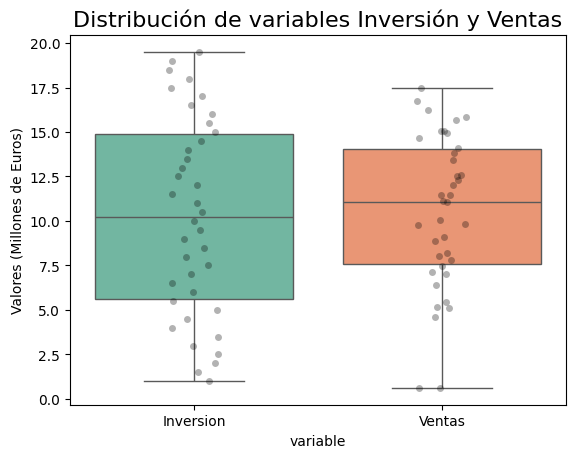

In [9]:
df2 = pd.DataFrame(data=df, columns=["Inversion", "Ventas"])
boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df2), order=["Inversion", "Ventas"], palette="Set2")
boxplot = sns.stripplot(x="variable", y="value", data=pd.melt(df2), marker="o", alpha=0.3, color="black", order=["Inversion", "Ventas"])
boxplot.axes.set_title("Distribución de variables Inversión y Ventas", fontsize=16)
boxplot.set_ylabel("Valores (Millones de Euros)", fontsize=10)
plt.show()

- El rango intercuartílico (IQR) de la inversión es más amplio que el de las ventas, lo que confirma una mayor variabilidad en los montos invertidos.
- En ambas variables se observan puntos fuera de los bigotes, lo que sugiere la presencia de valores atípicos (outliers). Estos pueden representar inversiones o ventas excepcionalmente altas o bajas en comparación con la distribución general.
- La dispersión en la inversión es mayor. Las ventas muestran una menor variabilidad, lo que sugiere que, a pesar de los diferentes niveles de inversión, los resultados en ventas tienden a mantenerse dentro de un rango más estable.




In [11]:
# Por outlier entendemos valores superiores a la suma del tercer cuartil más 1.5 veces el IQR,
# o inferiores al primer cuartil menos 1.5 veces el IQR

# ... (código para calcular el primer cuartil, tercer cuartil e IQR) ...

# Ejemplo de como detectar outliers:
# for valor in data:
#   if valor > tercer_cuartil + 1.5 * iqr or valor < primer_cuartil - 1.5 * iqr:
#     print("Outlier detectado:", valor)

In [27]:
Q1_ventas = df["Ventas"].quantile(0.25)
Q3_ventas = df["Ventas"].quantile(0.75)
IQR_ventas = Q3_ventas - Q1_ventas

Q1_inversion = df["Inversion"].quantile(0.25)
Q3_inversion = df["Inversion"].quantile(0.75)
IQR_inversion = Q3_inversion - Q1_inversion

In [28]:
limite_superior_ventas = Q3_ventas + 1.5 * IQR_ventas
limite_inferior_ventas = Q1_ventas - 1.5 * IQR_ventas

limite_superior_inversion = Q3_inversion + 1.5 * IQR_inversion
limite_inferior_inversion = Q1_inversion - 1.5 * IQR_inversion

In [29]:
outliers_ventas = df[(df["Ventas"] > limite_superior_ventas) | (df["Ventas"] < limite_inferior_ventas)]
outliers_inversion = df[(df["Inversion"] > limite_superior_inversion) | (df["Inversion"] < limite_inferior_inversion)]

In [30]:
print("Outliers en Ventas:\n", outliers_ventas)
print("\nOutliers en Inversión:\n", outliers_inversion)

Outliers en Ventas:
 Empty DataFrame
Columns: [Fecha_anual, Inversion, Ventas]
Index: []

Outliers en Inversión:
 Empty DataFrame
Columns: [Fecha_anual, Inversion, Ventas]
Index: []


### Análisis entre variables Inversión y Ventas

In [ ]:
# piens en la covarianza

In [20]:
covarianza = np.cov(df['Inversion'], df['Ventas'])[0, 1]
print(f"La covarianza entre Inversión y Ventas es:{covarianza}")

La covarianza entre Inversión y Ventas es:22.92993243243243


Este valor indica una relación directa y positiva entre la inversión y las ventas. Esto significa que cuando la inversión aumenta, las ventas también tienden a aumentar, y viceversa.

In [19]:
correlacion = pearsonr(df['Inversion'], df['Ventas'])[0]
print(f"La correlación entre Inversión y Ventas es: {correlacion}")

La correlación entre Inversión y Ventas es: 0.9562823420491504


Un valor de 0.956 indica una correlación positiva y muy fuerte entre la inversión y las ventas. Esto refuerza lo que se observo con la covarianza (a mayor inversión, mayores ventas).
La correlación se encuentra muy cercana a 1, lo que muestra una relación lineal muy fuerte

## Ajuste del modelo utilizando scipy

In [ ]:
## Ajuste del modelo utilizando statsmodels

In [21]:
X = sm.add_constant(df['Inversion'])

In [22]:
modelo = sm.OLS(df['Ventas'], X)  # OLS: Ordinary Least Squares
resultados = modelo.fit()

In [23]:
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                 Ventas   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     384.9
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           8.25e-21
Time:                        19:20:20   Log-Likelihood:                -62.255
No. Observations:                  38   AIC:                             128.5
Df Residuals:                      36   BIC:                             131.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8805      0.440      6.546      0.0

- El R² indica que el 91.4% de la variabilidad en las Ventas es explicada por la Inversión. Es un valor alto, por lo que se puede decir que la inversión tiene una fuerte relación con las ventas.
- El Ajuste de R-cuadrado es 0.912, similar al R², lo que confirma que el modelo se ajusta bien a los datos.
- Estadístico F = 384.9, con un p-valor de 8.25e-21. Un valor de p < 0.05 indica que el modelo es estadísticamente significativo
- El const representa el nivel esperado de ventas cuando la inversión es cero. En este caso, sin inversión se esperan aproximadamente 2.88 millones de euros en ventas.
- El coeficiente de inversión significa que por cada millón de euros adicional invertido, las ventas aumentan en aproximadamente 0.7427 millones de euros.


## Escribe tus conclusiones finales

1.  El modelo es sólido y explica bien la relación entre inversión y ventas, con un R² alto (91.4%) y coeficientes estadísticamente significativos.
2. Existe una relación positiva y estadísticamente significativa entre la inversión y las ventas. Esto significa que cuando la inversión aumenta, las ventas también aumentaran, y viceversa.
3. La inversión tiene un impacto positivo en las ventas, con una relación de 0.7427, es decir, por cada millón de euros invertido, las ventas aumentan en aproximadamente 742,700 euros.
4. Se recomienda  mantener o incrementar la inversión en áreas clave como marketing, digitalización y mejora del producto o servicio  para impulsar un mayor crecimiento en las ventas.
5. Se recomienda monitorear constantemente los resultados y ajustar la estrategia de inversión para evitar gastos innecesarios.

